# Week2授業課題2 富士下山問題
## 注意： ペアプロで分担しており、前半は森さんのコードを一部流用しています

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
fuji[0:10]

array([[   0.      ,   35.134141,  139.132082,    0.      ,    0.      ],
       [   1.      ,   35.135826,  139.129202,    0.      ,  322.      ],
       [   2.      ,   35.13751 ,  139.126322,    0.      ,  644.      ],
       [   3.      ,   35.139194,  139.123441,    0.      ,  966.      ],
       [   4.      ,   35.140878,  139.12056 ,    0.      , 1288.      ],
       [   5.      ,   35.142562,  139.117679,    0.      , 1611.      ],
       [   6.      ,   35.144246,  139.114799,    6.62    , 1933.      ],
       [   7.      ,   35.145929,  139.111917,    7.21    , 2255.      ],
       [   8.      ,   35.147613,  139.109036,   12.2     , 2577.      ],
       [   9.      ,   35.149297,  139.106155,   54.41    , 2899.      ]])

# 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

In [4]:
#データの形状の確認
fuji.shape

(300, 5)

In [5]:
#横軸（地点の番号）と縦軸（標高）のデータを抽出
position_number = fuji[:, 0]
evaluation = fuji[:, 3]

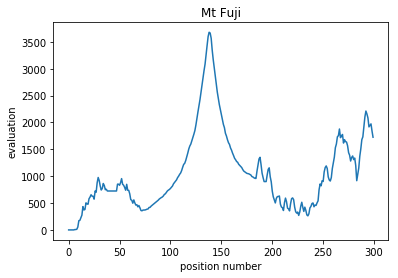

In [6]:
#matplotlibでグラフ描写
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(position_number, evaluation)

## 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

勾配　＝　yの変化量（標高）　/ xの変化量（その地点での番号）

In [7]:
#勾配を計算する関数の作成
#引数xの差を算出
# 引数xからyの値を算出しx-1を引く
#勾配　＝　yの変化量（標高）　/ xの変化量（その地点での番号）を用いて勾配を算出

def get_slope(x):

        
        x_diff = x - (x-1)
        y_diff = fuji[x,3] - fuji[x-1, 3]
        slope = y_diff / x_diff
        return slope

In [8]:
#確認
get_slope(136)

168.35000000000036

## 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

実装上の注意

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り柄ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

In [9]:
def move_position(x, alpha):
    moved_position_temp = int((x - alpha*get_slope(x)).round())
#    print(type(moved_position_temp))
#    if (0 < moved_position_temp) and (moved_position_temp < 299):
    if 0 < moved_position_temp < 299:
        return moved_position_temp
    elif 0 >= moved_position_temp:
        return 0
    else:
        return 299

In [10]:
move_position(10, 0.2)

0

In [11]:
get_slope(136)

168.35000000000036

In [12]:
fuji[:,0][-1]

299.0

In [13]:
x=298
alpha=0.2

moved_position = (x - alpha*get_slope(x))

In [14]:
type(move_position(137, 0.2))

int

## 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

実装上の注意

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [15]:
x=137
alpha =0.2

i=0
point_list = [x]
    
while point_list[i] != move_position(point_list[i], alpha):
    point_list.append(move_position(point_list[i], alpha))
    i += 1

In [16]:
point_list

[137, 104, 99, 96, 90, 87, 84, 81, 77, 75]

In [17]:
def down_mt(x, alpha):
    i=0
    point_list = [x]

    while point_list[i] != move_position(point_list[i], alpha) and i<100 and point_list[i] != 0 and point_list[i] != 299:
        point_list.append(move_position(point_list[i], alpha))
        i += 1
    return point_list

In [18]:
down_mt(10, 0.2)

[10, 0]

In [19]:
get_slope(10)

117.15

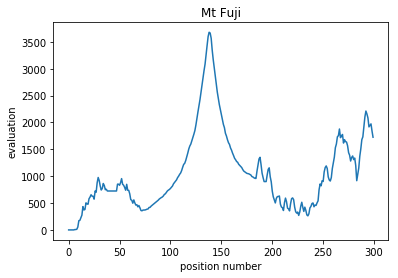

In [20]:
#matplotlibでグラフ描写
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(position_number, evaluation)

In [21]:
#matplotlibでグラフ描写
x=down_mt(137, 0.2)

y=fuji[x ,3]


In [22]:
y

array([3600.08,  883.89,  753.68,  700.15,  588.99,  536.54,  488.4 ,
        443.  ,  386.64,  371.19])

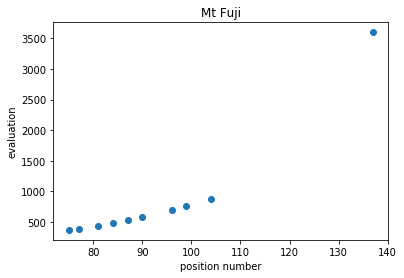

In [23]:
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.scatter(x, y)

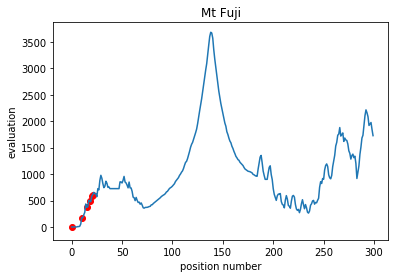

In [24]:


x1=down_mt(15, 0.1)

y1=fuji[x1 ,3]

#matplotlibでグラフ描写
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(position_number, evaluation)
plt.scatter(x1, y1, color='red')
#plt.plot(x, y, color='red')

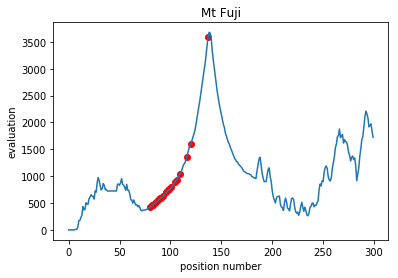

In [25]:
x1=down_mt(137, 0.1)

y1=fuji[x1 ,3]

#matplotlibでグラフ描写
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(position_number, evaluation)
plt.scatter(x1, y1, color='red')
#plt.plot(x, y, color='red')

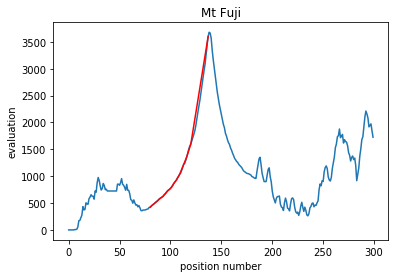

In [26]:
x1=down_mt(137, 0.1)

y1=fuji[x1 ,3]

#matplotlibでグラフ描写
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(position_number, evaluation)
plt.plot(x1, y1, color='red')
#plt.plot(x, y, color='red')

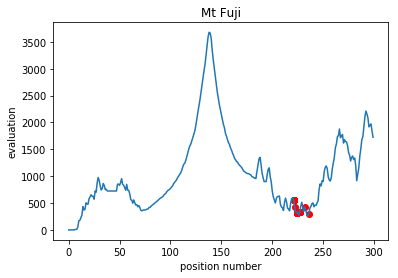

In [27]:
x1=down_mt(222, 0.1)

y1=fuji[x1 ,3]

#matplotlibでグラフ描写
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(position_number, evaluation)
plt.scatter(x1, y1, color='red')
#plt.plot(x, y, color='red')

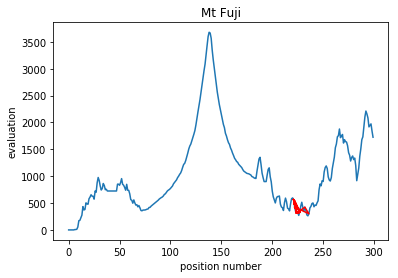

In [28]:
x1=down_mt(222, 0.1)

y1=fuji[x1 ,3]

#matplotlibでグラフ描写
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(position_number, evaluation)
plt.plot(x1, y1, color='red')
#plt.plot(x, y, color='red')

In [29]:
down_mt(10, 0.2)

[10, 0]

In [30]:
a=0.2
down_list=[[0]]
down_list_h=[0]
for i in range(1, 300):
    down_list.append(down_mt(i, a))
    down_list_h.append(down_mt(i, a)[-1])

In [31]:
down_list[137]

[137, 104, 99, 96, 90, 87, 84, 81, 77, 75]

In [32]:
down_list[137][-1]

75

In [33]:
fuji[75, 3]

371.19

In [34]:
down_list_h[137]

75

In [35]:
len(down_list)

300

In [36]:
down_list_y=fuji[down_list_h,3]

In [37]:
down_list[130:135]

[[130, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75],
 [131, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75],
 [132, 108, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75],
 [133, 105, 100, 96, 90, 87, 84, 81, 77, 75],
 [134, 110, 105, 100, 96, 90, 87, 84, 81, 77, 75]]

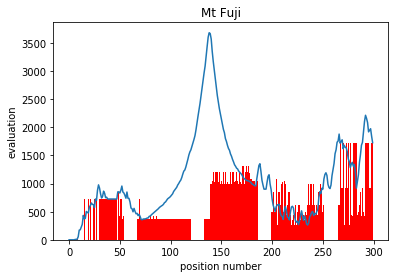

In [38]:
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
#plt.bar(range(0, len(down_list)), down_list_y, color ='red')
plt.bar(position_number, down_list_y, color ='red')
plt.plot(position_number, evaluation)

上記で一部、赤の値がないが、ゼロではないため、plt.barのバグ？

In [39]:
down_list[50:60]

[[50, 54, 58, 80],
 [51, 41],
 [52, 37, 35, 43],
 [53, 74],
 [54, 58, 80],
 [55, 63, 74],
 [56, 66, 74],
 [57, 35, 43],
 [58, 80],
 [59]]

In [40]:
down_list_y[50: 60]

array([420.6 , 724.5 , 724.5 , 371.04, 420.6 , 371.04, 371.04, 724.5 ,
       420.6 , 736.48])

In [41]:
fuji[7, 3]

7.21

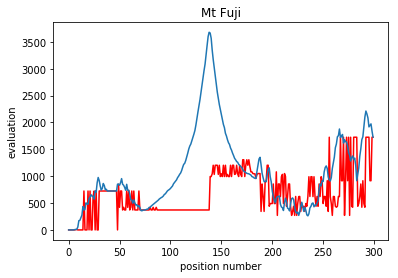

In [42]:
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(range(0, len(down_list)), down_list_y, color ='red')
plt.plot(position_number, evaluation)

# 【問題7】（アドバンス問題）ハイパーパラメータの変更

In [43]:
def hyper_parameter(alpha=0.2):
    a = alpha
    down_list = [[0]]
    down_list_h = [0]
    for i in range(1, 300):
        down_list.append(down_mt(i, a))
        down_list_h.append(down_mt(i, a)[-1])

    down_list_y=fuji[down_list_h,3]    

    plt.title("Mt Fuji")
    plt.xlabel("position number")
    plt.ylabel("evaluation")
    plt.plot(range(0, len(down_list)), down_list_y, color ='red')
    plt.plot(position_number, evaluation)

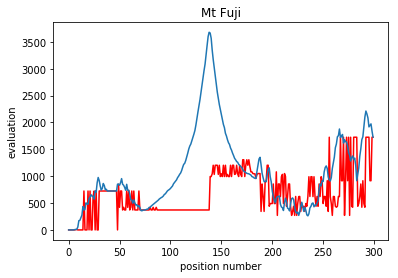

In [44]:
hyper_parameter(0.2)

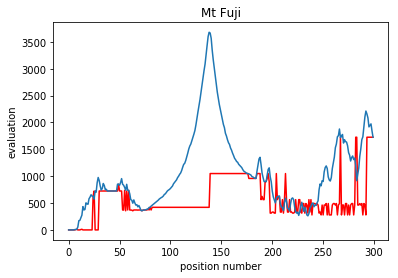

In [45]:
hyper_parameter(0.1)#0.2のときより精度向上（振動が少ない）

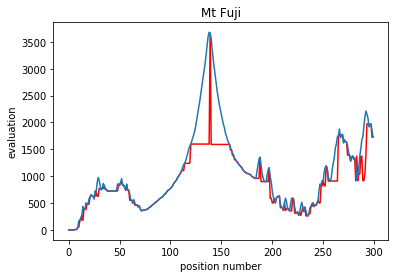

In [46]:
hyper_parameter(0.01)#殆ど動けない

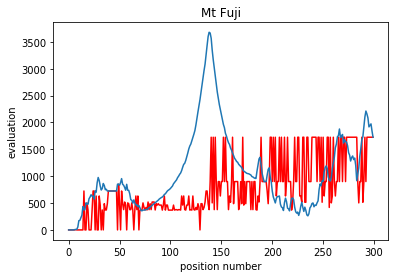

In [47]:
hyper_parameter(0.5)#振動多い

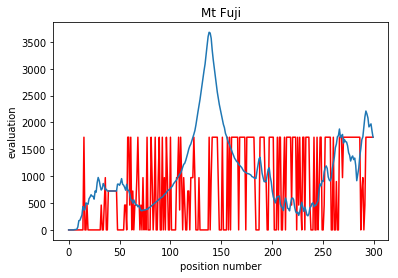

In [48]:
hyper_parameter(1)

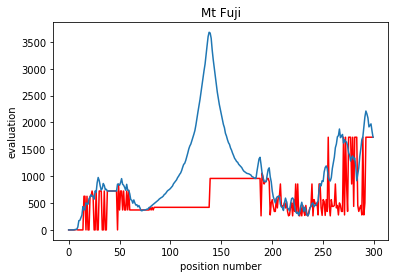

In [49]:
hyper_parameter(0.15)

## 考察
alpha = 0.1 あたりが良い（振動少なく、どこから行っても、比較的小さい値になる）  
alphaを動的に変化させれば精度は向上すると思われる（alphaを大きい値から徐々に小さくしていく、振動するときは小さくする、など）

# 再帰関数を使ってみる

In [50]:
def down_mt_rc(point_list, i=int(0), alpha=0.2):
    i += 1
    point_list.append(move_position(point_list[i-1], alpha))
    if i >100 or point_list[i] == 0 or point_list[i] == 299 or point_list[i]==point_list[i-1]:
        return point_list
    else:
        return down_mt_rc(point_list, i, alpha) #再帰関数

In [51]:
down_mt_rc([137])

[137, 104, 99, 96, 90, 87, 84, 81, 77, 75, 75]

In [52]:
down_mt_rc([1])

[1, 1]

In [53]:
%timeit down_mt_rc([137])
%timeit down_mt(137, 0.2)

32.3 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
51.4 µs ± 2.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [54]:
%timeit down_mt_rc([1])
%timeit down_mt(1, 0.2)

2.97 µs ± 52.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.77 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [55]:
%timeit down_mt_rc([150])
%timeit down_mt(150, 0.2)

329 µs ± 17.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
611 µs ± 97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## スピードは、一般的に再帰関数の方が約2倍速い

In [56]:
def hyper_parameter_rc(alpha=0.2):
    down_list = [[0]]
    down_list_h = [0]
    for i in range(1, 300):
        down_list.append(down_mt_rc([i], alpha=alpha)) #再帰関数を用いたもの
        down_list_h.append(down_mt_rc([i], alpha=alpha)[-1]) #再帰関数を用いたもの

    down_list_y=fuji[down_list_h,3]    

    plt.title("Mt Fuji")
    plt.xlabel("position number")
    plt.ylabel("evaluation")
    plt.plot(range(0, len(down_list)), down_list_y, color ='red')
    plt.plot(position_number, evaluation)

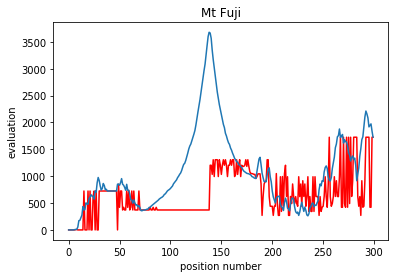

In [57]:
hyper_parameter_rc(0.2)

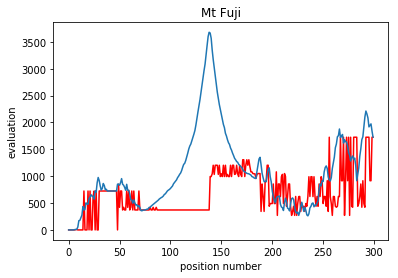

In [58]:
hyper_parameter(0.2)

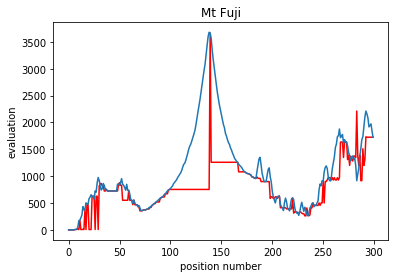

In [59]:
hyper_parameter_rc(0.03)

211 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


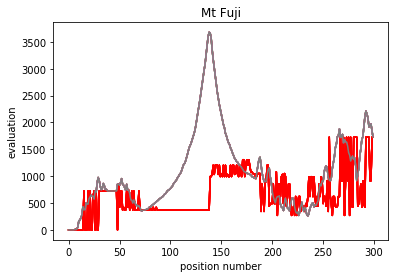

In [60]:
%timeit hyper_parameter(0.2)

119 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


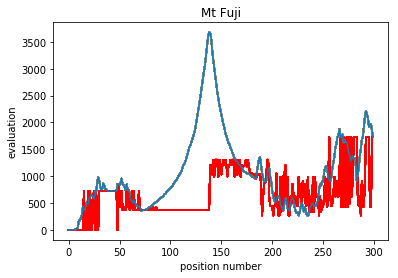

In [61]:
%timeit hyper_parameter_rc(0.2)

## スピードはやはり再帰関数の方が２倍程度速い（グラフを書く速度が含まれているが）

# ハイパーパラメータの検討
　
 aplpha = range (0.01, 1, 0.01）で、スタート地点を 0 - 299に振ったときの、最終標高の平均・標準偏差を検討する

In [83]:
from statistics import mean, median,variance,stdev

In [108]:
alpha_list=[]
down_list_alpha_mean=[]
down_list_alpha_sigma=[]
for a in range(1, 101):
    alpha=a/100
    #print(alpha)
    alpha_list.append(alpha)
    down_list = [[0]]
    down_list_h = [0]
    down_list_y = [0]
    for i in range(1, 300):
        down_list.append(down_mt_rc([i], alpha=alpha)) #再帰関数を用いたもの
        down_list_h.append(down_mt_rc([i], alpha=alpha)[-1]) #再帰関数を用いたもの

    down_list_y=fuji[down_list_h,3] 
    #print(down_list_y)

    down_list_alpha_mean.append(mean(down_list_y))
    down_list_alpha_sigma.append(stdev(down_list_y))

In [109]:
len(down_list_alpha_mean)

100

In [110]:
len(down_list_alpha_sigma)

100

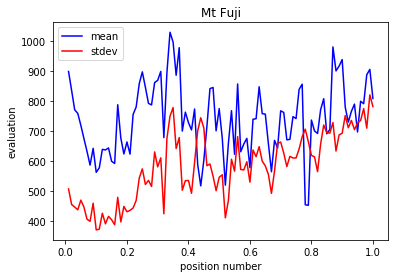

In [112]:
    plt.title("Mt Fuji")
    plt.xlabel("position number")
    plt.ylabel("evaluation")
    plt.plot(alpha_list, down_list_alpha_mean, color ='blue', label='mean')
    plt.plot(alpha_list, down_list_alpha_sigma, color ='red', label='stdev')
    plt.legend()

## 解釈
平均と標準偏差が低くなるのはalpha=0.1 - 0.2くらい  
alpha>0.4となると、安定した結果が残せなくなる（ばらつきが大きい）

# ハイパーパラメータの検討(2)
　
alphaを0.15などからはじめて、振動したら、alphaを1/2にする　→ 振動したときにその中で小さい値になるようにする

In [120]:
def down_mt_rc_alpha(point_list, i=int(0), alpha=0.2):
    i += 1
    point_list.append(move_position(point_list[i-1], alpha))
    if point_list[i] == 0 or point_list[i] == 299 or point_list[i]==point_list[i-1]:
        return point_list
    elif i >100:
        #print('over 100')
        return down_mt_rc_alpha(point_list, i, alpha/2) #100以上になったら、alphaを1/2にする
    else:
        return down_mt_rc_alpha(point_list, i, alpha) #再帰関数

In [121]:
def hyper_parameter_rc_alpha(alpha=0.2):
    down_list = [[0]]
    down_list_h = [0]
    for i in range(1, 300):
        down_list.append(down_mt_rc_alpha([i], alpha=alpha)) #再帰関数を用いたもの
        down_list_h.append(down_mt_rc_alpha([i], alpha=alpha)[-1]) #再帰関数を用いたもの

    down_list_y=fuji[down_list_h,3]    

    plt.title("Mt Fuji")
    plt.xlabel("position number")
    plt.ylabel("evaluation")
    plt.plot(range(0, len(down_list)), down_list_y, color ='red')
    plt.plot(position_number, evaluation)

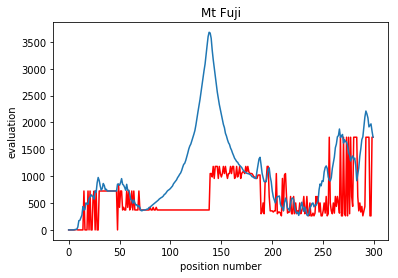

In [122]:
hyper_parameter_rc_alpha(0.2)

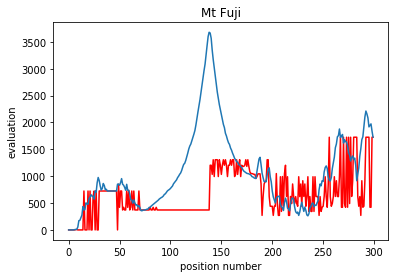

In [123]:
hyper_parameter_rc(0.2)

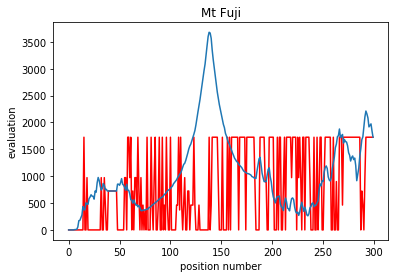

In [124]:
hyper_parameter_rc(1)

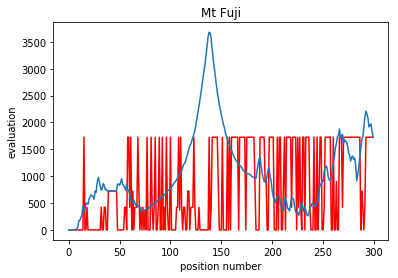

In [125]:
hyper_parameter_rc_alpha(1)

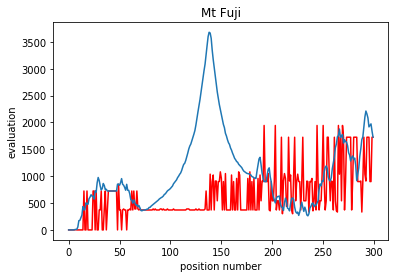

In [126]:
hyper_parameter_rc_alpha(0.4)

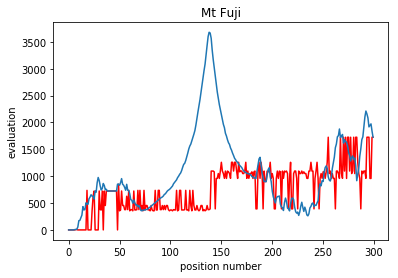

In [127]:
hyper_parameter_rc_alpha(0.3)

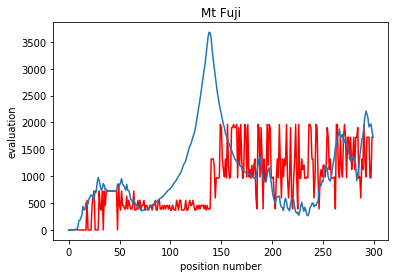

In [129]:
hyper_parameter_rc(0.3)

## 考察
振動が減って、少し改善されているのが分かる

In [131]:
alpha_list=[]
down_list_alpha_mean_1=[]
down_list_alpha_sigma_1=[]
for a in range(1, 101):
    alpha=a/100
    #print(alpha)
    alpha_list.append(alpha)
    down_list = [[0]]
    down_list_h = [0]
    down_list_y = [0]
    for i in range(1, 300):
        down_list.append(down_mt_rc_alpha([i], alpha=alpha)) #再帰関数を用いたもの
        down_list_h.append(down_mt_rc_alpha([i], alpha=alpha)[-1]) #再帰関数を用いたもの

    down_list_y=fuji[down_list_h,3] 
    #print(down_list_y)

    down_list_alpha_mean_1.append(mean(down_list_y))
    down_list_alpha_sigma_1.append(stdev(down_list_y))

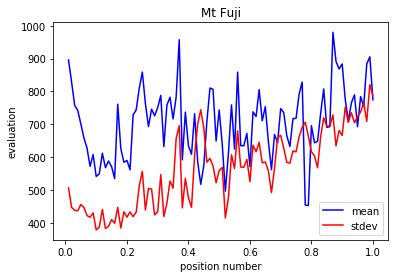

In [132]:
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(alpha_list, down_list_alpha_mean_1, color ='blue', label='mean')
plt.plot(alpha_list, down_list_alpha_sigma_1, color ='red', label='stdev')
plt.legend()

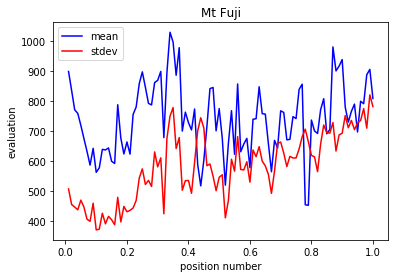

In [133]:
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(alpha_list, down_list_alpha_mean, color ='blue', label='mean')
plt.plot(alpha_list, down_list_alpha_sigma, color ='red', label='stdev')
plt.legend()

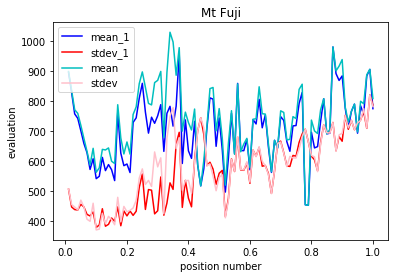

In [135]:
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(alpha_list, down_list_alpha_mean_1, color ='blue', label='mean_1')
plt.plot(alpha_list, down_list_alpha_sigma_1, color ='red', label='stdev_1')
plt.plot(alpha_list, down_list_alpha_mean, color ='c', label='mean')
plt.plot(alpha_list, down_list_alpha_sigma, color ='pink', label='stdev')
plt.legend()

In [138]:
mean(np.array(down_list_alpha_mean) - np.array(down_list_alpha_mean_1))

36.97603900000001

In [139]:
mean(np.array(down_list_alpha_mean))

739.7139676666667

In [140]:
mean(np.array(down_list_alpha_sigma) - np.array(down_list_alpha_sigma_1))

15.536074079723704

In [141]:
mean(np.array(down_list_alpha_sigma))

579.8232107556775

## 考察
alphaを変動させることにより、精度が上がっている（平均と標準偏差が下がっている → ばらつきが少なく、低い値を出せている）